In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AL_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,NaN,1.837,NaN,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,NaN,0.00,0.00,...,NaN,0.0,NaN,0.0,0.065,0.000,0.000,1.189,NaN,69.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	29
float64		column 5	29
float64		column 6	0
float64		column 7	58
float64		column 8	29
float64		column 9	145
float64		column 10	58
float64		column 11	120
float64		column 12	0
float64		column 13	0
float64		column 14	116
float64		column 15	116
float64		column 16	58
float64		column 17	87
float64		column 18	87
float64		column 19	0
float64		column 20	116
float64		column 21	29
float64		column 22	29
float64		column 23	236
float64		column 24	116
float64		column 25	290
float64		column 26	555
float64		column 27	29
float64		column 28	642
float64		column 29	555
float64		column 30	526
float64		column 31	584
float64		column 32	671
float64		column 33	29
float64		column 34	932
float64		column 35	816
float64		column 36	841
float64		column 37	145
float64		column 38	58
float64		column 39	145
float64		column 40	903
float64		column 41	87
float64		column 42	261
float64		column 43	319
float64		c

In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4597.000000,4597.000000,4597.000000,4568.000000,4568.000000,4597.000000,4539.000000,4568.000000,4452.000000,4539.000000,...,4539.000000,4249.000000,4481.000000,4539.000000,4510.000000,4307.000000,4158.000000,4162.000000,4158.000000,4129.000000
mean,0.104625,0.213200,0.280433,0.065856,0.313036,0.095928,0.113985,0.105922,0.088619,0.239749,...,0.031976,0.039698,0.139036,0.016982,0.270182,0.075093,0.043142,4.918853,50.017797,279.772342
std,0.305479,1.291121,0.504121,1.400171,0.674419,0.273934,0.390645,0.402409,0.276393,0.646811,...,0.287291,0.248289,0.270993,0.109901,0.822159,0.244309,0.432275,28.060123,195.493146,597.727151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.285000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.313750,0.052500,0.000000,3.714750,43.000000,265.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

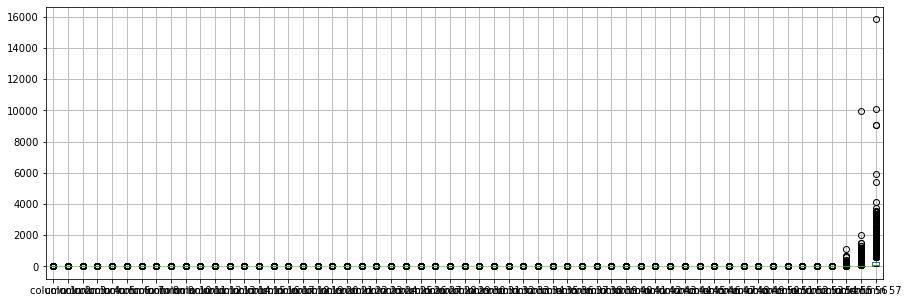

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1       0.104625
column 2       0.213200
column 3       0.280433
column 4       0.065856
column 5       0.313036
column 6       0.095928
column 7       0.113985
column 8       0.105922
column 9       0.088619
column 10      0.239749
column 11      0.059165
column 12      0.541884
column 13      0.093833
column 14      0.058563
column 15      0.049842
column 16      0.247140
column 17      0.142075
column 18      0.186439
column 19      1.661710
column 20      0.085285
column 21      0.811132
column 22      0.122077
column 23      0.102681
column 24      0.091522
column 25      0.551943
column 26      0.270831
column 27      0.771528
column 28      0.125932
column 29      0.099466
column 30      0.100933
column 31      0.065492
column 32      0.046656
column 33      0.097307
column 34      0.049007
column 35      0.107099
column 36      0.099694
column 37      0.139198
column 38      0.013382
column 39      0.078484
column 40      0.066332
column 41      0.044202
column 42      0

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016799,0.065814,0.013251,0.023084,0.059646,0.008861,-0.003933,0.108379,0.039739,...,-0.017497,-0.025867,-0.020698,-0.033302,0.055069,0.115716,-0.007284,0.044962,0.053053,0.070263
column 2,-0.016799,1.000000,-0.033469,-0.006965,-0.023941,-0.024857,0.003622,-0.016570,-0.004618,0.033167,...,-0.015721,-0.006905,-0.050647,-0.018567,-0.014577,-0.012295,0.002415,0.001733,-0.002463,-0.027128
column 3,0.065814,-0.033469,1.000000,-0.020337,0.077566,0.087841,0.038046,0.012192,0.086158,0.029922,...,-0.025989,-0.034488,-0.019007,-0.035233,0.108001,0.086302,-0.004889,0.099658,0.089358,0.063230
column 4,0.013251,-0.006965,-0.020337,1.000000,0.003070,-0.010049,0.019959,0.010200,-0.002311,-0.005378,...,-0.001946,-0.000441,-0.012494,-0.007135,-0.004167,0.011319,-0.000456,0.005450,0.018007,0.023547
column 5,0.023084,-0.023941,0.077566,0.003070,1.000000,0.053559,0.148425,0.030278,0.017846,0.035014,...,-0.031883,-0.031772,-0.047176,-0.026634,0.024530,0.043762,0.002103,0.045644,0.048985,-0.000989
column 6,0.059646,-0.024857,0.087841,-0.010049,0.053559,1.000000,0.063220,0.079409,0.104234,0.011168,...,-0.031733,-0.018131,-0.008472,-0.015386,0.064625,0.107954,0.020355,-0.007860,0.073846,0.080144
column 7,0.008861,0.003622,0.038046,0.019959,0.148425,0.063220,1.000000,0.038803,0.041233,0.051821,...,-0.034477,-0.033597,-0.052168,-0.027771,0.052799,0.066857,0.050554,0.039428,0.056552,-0.011184
column 8,-0.003933,-0.016570,0.012192,0.010200,0.030278,0.079409,0.038803,1.000000,0.102832,0.081041,...,-0.021301,-0.027212,-0.033403,-0.020170,0.029841,0.049979,-0.006617,0.015572,0.034662,0.040416
column 9,0.108379,-0.004618,0.086158,-0.002311,0.017846,0.104234,0.041233,0.102832,1.000000,0.121951,...,-0.024886,-0.015041,-0.030733,0.006800,0.038703,0.139237,-0.000445,0.105599,0.169429,0.248583
column 10,0.039739,0.033167,0.029922,-0.005378,0.035014,0.011168,0.051821,0.081041,0.121951,1.000000,...,-0.016497,0.010908,0.007330,0.010561,0.034130,0.074167,0.039266,0.075868,0.094472,0.077115


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 596.4906432254804
Epoch: 1 , loss: 592.753201634211
Epoch: 2 , loss: 594.8030573615629
Epoch: 3 , loss: 589.8238911379506
Epoch: 4 , loss: 591.2527025867422
Epoch: 5 , loss: 589.3900314490554
Epoch: 6 , loss: 593.5068933307501
Epoch: 7 , loss: 596.1296196648468
Epoch: 8 , loss: 591.8961095510875
Epoch: 9 , loss: 592.1819151237036
Epoch: 10 , loss: 595.6891222166267
Epoch: 11 , loss: 592.7263808034438
Epoch: 12 , loss: 589.0636113927754
Epoch: 13 , loss: 592.4888750667772
Epoch: 14 , loss: 584.0460209863111
Epoch: 15 , loss: 589.1976148492367
Epoch: 16 , loss: 585.0390915820823
Epoch: 17 , loss: 580.6042468240452
Epoch: 18 , loss: 567.9545623566631
Epoch: 19 , loss: 543.8744820784193
Epoch: 20 , loss: 522.520816178272
Epoch: 21 , loss: 516.0831542596584
Epoch: 22 , loss: 503.39106633521953
Epoch: 23 , loss: 512.1603982639645
Epoch: 24 , loss: 512.2002182272669
Epoch: 25 , loss: 496.5175594103876
Epoch: 

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.045056,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,-0.393428,0.0,-3.399812,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.037123,0.0,0.0,...,0.012301,0.0,0.08561,0.0,0.0,0.0,0.000000,0.0,7.128783,0.0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

15751.686614708246

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [39]:
NRMS=numerator/denominator
NRMS


0.3319033598559279

In [40]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.000000,0.000000,0.00,0.00,...,0.000000,0.0,0.00000,0.0,0.778,0.000,0.000000,3.756,61.000000,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.210000,0.070000,0.00,0.94,...,0.000000,0.0,0.13200,0.0,0.372,0.180,0.048000,5.114,101.000000,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.310000,0.630000,0.31,0.63,...,0.000000,0.0,0.13500,0.0,0.135,0.000,0.000000,3.537,40.000000,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.000000,1.850000,0.00,0.00,...,0.000000,0.0,0.22300,0.0,0.000,0.000,0.000000,3.000,15.000000,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.000000,0.000000,0.00,0.64,...,0.000000,0.0,0.05400,0.0,0.164,0.054,0.000000,1.671,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.000000,0.0,0.34800,0.0,1.160,0.000,0.000000,3.121,15.000000,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.000000,0.0,0.00000,0.0,0.000,0.000,0.000000,3.043,15.000000,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.045056,0.000000,0.00,0.00,...,0.000000,0.0,0.13600,0.0,0.000,0.000,0.015572,1.837,8.600188,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.000000,0.037123,0.00,0.00,...,0.012301,0.0,0.11761,0.0,0.065,0.000,0.000000,1.189,12.128783,69.0


In [42]:
imputations[-1].to_excel("Spam_AL_5(imp).xlsx", index=False, header=False)